# Kalibracja modelu

In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.calibration import calibration_curve, CalibratedClassifierCV, CalibrationDisplay

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
# Wczytanie zbioru danych
df = pd.read_csv('data/credit_fraud_sample.csv')
del df['Unnamed: 0']

In [16]:
## Pretrenuj model
train_x, test_x, train_y, test_y = train_test_split(df.iloc[:,1:3],df['Class'], test_size=0.3, random_state=123)
model = LogisticRegression().fit(train_x,train_y)
train_pred = model.predict_proba(train_x)[:,1]
test_pred = model.predict_proba(test_x)[:,1]
df['predict_proba'] = model.predict_proba(df[model.feature_names_in_])[:,1]

In [17]:
# Przygotowanie danych
cal_cur_train = calibration_curve(train_y, train_pred, n_bins=10, strategy='uniform')
cal_cur_test = calibration_curve(test_y, test_pred,n_bins=10, strategy='quantile')

In [18]:
cal_cur_test

(array([0.        , 0.1       , 0.24137931, 0.33333333, 0.4137931 ,
        0.4       , 0.55172414, 0.86666667, 0.86206897, 1.        ]),
 array([0.12208145, 0.17039728, 0.22794588, 0.31721226, 0.39733274,
        0.46330655, 0.56104586, 0.70850499, 0.88259931, 0.99179955]))

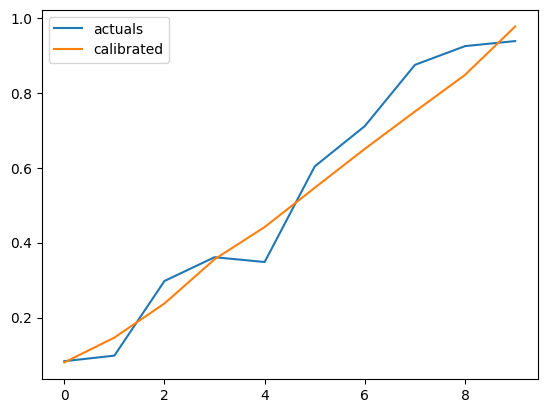

In [19]:
# Train - uniform
plt.plot(cal_cur_train[0], label = 'actuals')
plt.plot(cal_cur_train[1], label = 'calibrated')
plt.legend()
plt.show()

In [20]:
cal_cur_test

(array([0.        , 0.1       , 0.24137931, 0.33333333, 0.4137931 ,
        0.4       , 0.55172414, 0.86666667, 0.86206897, 1.        ]),
 array([0.12208145, 0.17039728, 0.22794588, 0.31721226, 0.39733274,
        0.46330655, 0.56104586, 0.70850499, 0.88259931, 0.99179955]))

In [ ]:
calibration_curve()

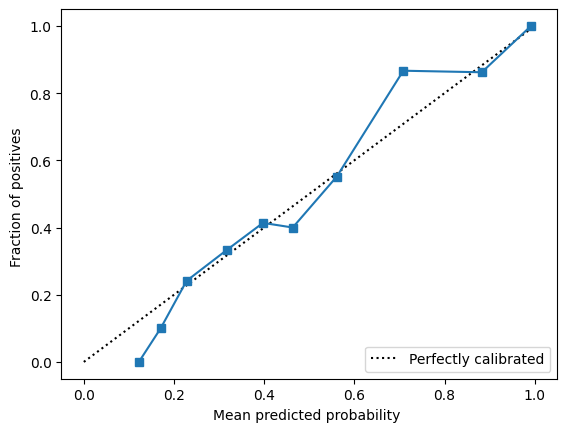

In [26]:
# calibration display
disp = CalibrationDisplay(cal_cur_test[0],cal_cur_test[1],test_y)
disp.plot()

In [27]:
# Kalibracja
model = LogisticRegression()
calibration = CalibratedClassifierCV(model, cv=3 , method='sigmoid').fit(train_x,train_y)

In [32]:
# Predykcja
test_pred_cal = calibration.predict_proba(test_x)[:,1]
train_pred_cal = calibration.predict_proba(train_x)[:,1]

In [29]:
# Sprawdzenie
cal_cur_check = calibration_curve(test_y, test_pred_cal, n_bins=10, strategy='quantile')

In [30]:
# Wykres
disp = CalibrationDisplay(cal_cur_check[0], cal_cur_check[1],test_y)

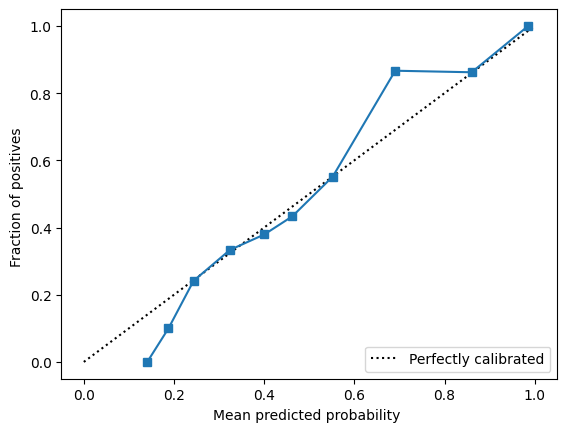

In [31]:
disp.plot()

In [33]:
cal_cur_check_train = calibration_curve(train_y, train_pred_cal, n_bins=10, strategy='quantile')

In [34]:
disp = CalibrationDisplay(cal_cur_check_train[0],cal_cur_check_train[1], train_y)

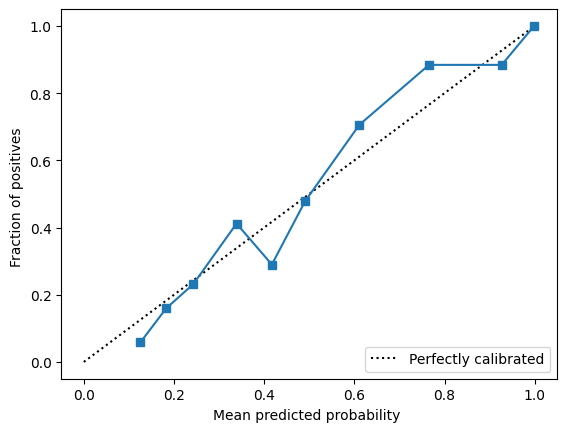

In [35]:
disp.plot()